Based on the scatterplot sentiment appears to overall be more negative.   CBSNews and the NYTimes do appear to push the sentiment negative with an aggregate score over 7.5 for each.  Foxnews is the only outlet with an aggregate score that is positive.

In [111]:

# Dependencies
import tweepy
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
from datetime import datetime
style.use('ggplot')

In [86]:
# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()


In [87]:
# Twitter API Keys
from config import (consumer_key, 
                    consumer_secret, 
                    access_token, 
                    access_token_secret)

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
#api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())
api = tweepy.API(auth, wait_on_rate_limit=True)

In [88]:
# Target Account
target_user = ("@CNN", "@CBSNews", "@Foxnews", "@BBCWorld", "@nytimes")

        # Variables for holding sentiments
compound_list = []
positive_list = []
negative_list = []
neutral_list = []
counter_list = []
user_list = []
date_list = []
text_list = []


# Loop through each user
for user in target_user:
    
    counter = 0
    
    
    
    # Loop through 10 pages of tweets (total 200 tweets)
    for page in tweepy.Cursor(api.user_timeline, id=user).pages(100):

        # Get all tweets from home feed
        public_tweets = api.user_timeline(user)
        page = page[0]
        tweet = json.dumps(page._json, indent=3)
        tweet = json.loads(tweet)
        text = tweet['text']

        # Run Vader Analysis on each tweet
        compound = analyzer.polarity_scores(text)["compound"]
        pos = analyzer.polarity_scores(text)["pos"]
        neu = analyzer.polarity_scores(text)["neu"]
        neg = analyzer.polarity_scores(text)["neg"]

        counter += 1
        
        # Add each value to the appropriate array
        compound_list.append(compound)
        positive_list.append(pos)
        negative_list.append(neg)
        neutral_list.append(neu)
        user_list.append(user)
        counter_list.append(counter)
        date_list.append(tweet["created_at"])
        text_list.append(tweet["text"])
        
    #print("")
    #print("User: %s" % user)
    #print(positive_list)
    

        
        #sentiment ={
         #       "User": user,
          #      "Compound": compound_list,
           #     "Positive": positive_list,
            #    "Negative": negative_list,
             #   "Neutral": neutral_list}
                #"Tweets Ago": counter_list}
        
                    # Add to counter 
   

In [89]:
sentiment ={"User": user_list,
            "Compound": compound_list,
            "Positive": positive_list,
            "Negative": negative_list,
            "Neutral": neutral_list,
            "Tweets Ago": counter_list,
               "Date": date_list,
                "Text": text_list}

In [90]:
data = pd.DataFrame(sentiment)
print(data)

     Compound                            Date  Negative  Neutral  Positive  \
0      0.6249  Thu Jun 28 19:02:55 +0000 2018     0.000    0.814     0.186   
1     -0.8126  Thu Jun 28 15:29:47 +0000 2018     0.261    0.739     0.000   
2      0.0000  Thu Jun 28 12:14:29 +0000 2018     0.000    1.000     0.000   
3     -0.2144  Thu Jun 28 07:47:06 +0000 2018     0.085    0.915     0.000   
4     -0.5267  Thu Jun 28 02:30:07 +0000 2018     0.175    0.825     0.000   
5     -0.2500  Wed Jun 27 23:44:06 +0000 2018     0.143    0.762     0.095   
6      0.0000  Wed Jun 27 21:13:03 +0000 2018     0.000    1.000     0.000   
7      0.8316  Wed Jun 27 18:47:08 +0000 2018     0.000    0.630     0.370   
8      0.0258  Wed Jun 27 15:14:06 +0000 2018     0.166    0.663     0.171   
9     -0.2263  Wed Jun 27 11:39:58 +0000 2018     0.139    0.861     0.000   
10     0.0000  Wed Jun 27 07:09:04 +0000 2018     0.000    1.000     0.000   
11     0.0000  Wed Jun 27 03:45:00 +0000 2018     0.000    1.000

In [91]:
data.to_csv("output/data.csv", index=False, header=True)

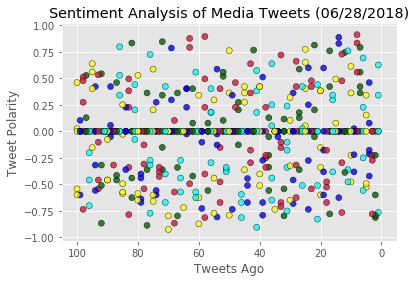

In [112]:
# Create plot
x_vals = data["Tweets Ago"]
y_vals = data["Compound"]
#scolors = data['User']
plt.scatter(x_vals,
         y_vals, marker="o", linewidth=0.5, color=["cyan", "darkgreen", "crimson", "blue", "yellow"], edgecolors="black",
         alpha=0.8)
now = datetime.now()
now = now.strftime("%m/%d/%Y")
plt.title(f"Sentiment Analysis of Media Tweets ({now})")
plt.xlim([105,-5])
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")


plt.show()
plt.savefig("output/Mediasentiment.png")

In [93]:
group = data.groupby('User')



In [94]:
aggregate = group['Compound'].sum()

In [95]:
aggregate.head()

User
@BBCWorld    -3.5159
@CBSNews    -13.0026
@CNN         -2.5954
@Foxnews      3.4066
@nytimes     -8.3036
Name: Compound, dtype: float64

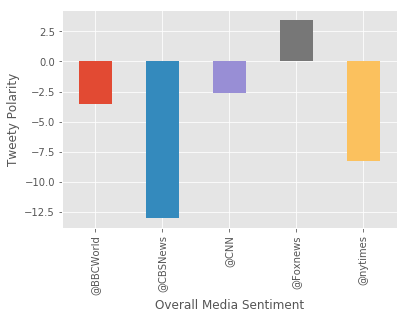

In [113]:
chart = aggregate.plot(kind="bar")

chart.set_xlabel('Overall Media Sentiment')
chart.set_ylabel('Tweety Polarity')
plt.savefig("output/OverallMediasentiment.png")
plt.show()
